In [1]:
pip install prophet

In [26]:
import numpy as np
import pandas as pd
import pandas as pd
from prophet import Prophet
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [3]:
df = pd.read_csv("rideshare_kaggle.csv")

In [4]:
df

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,...,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,...,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,...,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,...,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,...,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,...,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693066,616d3611-1820-450a-9845-a9ff304a4842,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,633a3fc3-1f86-4b9e-9d48-2b7132112341,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693068,64d451d0-639f-47a4-9b7c-6fd92fbd264f,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693069,727e5f07-a96b-4ad1-a2c7-9abc3ad55b4e,1.543708e+09,23,1,12,2018-12-01 23:53:05,America/New_York,West End,North End,Uber,...,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800


In [5]:
df = df[["datetime","cab_type","price"]]

In [6]:
df.dropna(inplace=True)

<ipython-input-6-c64f9f573c18>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.dropna(inplace=True)


In [7]:
df.sort_values(by='datetime',inplace=True)

<ipython-input-7-c8e145862fd4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.sort_values(by='datetime',inplace=True)


In [8]:
df

,datetime,cab_type,price
613926,2018-11-26 03:40:46,Uber,32.0
325880,2018-11-26 03:40:46,Lyft,27.5
325881,2018-11-26 03:40:46,Lyft,10.5
325882,2018-11-26 03:40:46,Lyft,22.5
325883,2018-11-26 03:40:46,Lyft,34.0
...,...,...,...
204553,2018-12-18 19:15:10,Uber,9.0
204550,2018-12-18 19:15:10,Uber,9.5
200821,2018-12-18 19:15:10,Uber,7.0
205381,2018-12-18 19:15:10,Lyft,7.0


In [9]:
df["datetime"] = pd.to_datetime(df["datetime"])

<ipython-input-9-f1c1dad77010>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["datetime"] = pd.to_datetime(df["datetime"])


In [10]:
df['datetime_by_hour'] = df['datetime'].dt.floor('H')

<ipython-input-10-647ef419613f>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['datetime_by_hour'] = df['datetime'].dt.floor('H')


In [11]:
df.drop(columns="datetime",inplace=True)

<ipython-input-11-3dfc95948213>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns="datetime",inplace=True)


In [12]:
df = df.groupby(['datetime_by_hour', 'cab_type'])['price'].sum().reset_index()

In [13]:
df = df.pivot(index='datetime_by_hour', columns='cab_type', values='price')

In [14]:
df

cab_type,Lyft,Uber
datetime_by_hour,,
2018-11-26 03:00:00,848.0,591.5
2018-11-26 04:00:00,2936.0,3513.5
2018-11-26 05:00:00,5086.0,5067.5
2018-11-26 06:00:00,12394.0,11767.0
2018-11-26 07:00:00,7722.5,7308.5
...,...,...
2018-12-18 15:00:00,13504.0,14083.0
2018-12-18 16:00:00,13285.0,15166.0
2018-12-18 17:00:00,14571.5,13788.0


<Axes: xlabel='datetime_by_hour'>

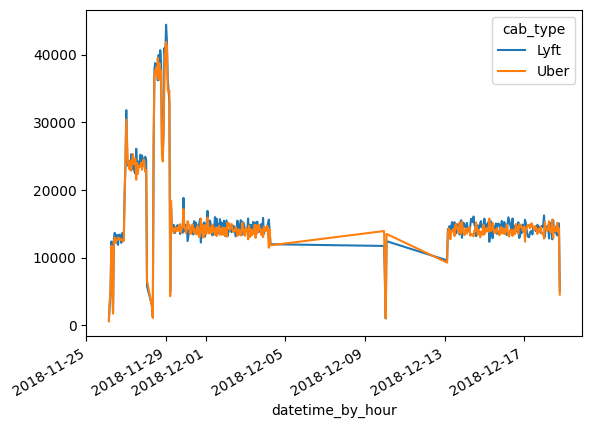

In [15]:
df.plot()

In [27]:
def timeseries_model(template, mask):
  template.reset_index(inplace=True)
  template1 = pd.DataFrame()
  template1["ds"] = template.iloc[:,0]
  template1["y"] = template.iloc[:,1]

  df_train = template1[template1["ds"] < mask]
  df_test = template1[template1["ds"] >= mask]

  model = Prophet(interval_width=0.8)
  model.fit(df_train)

  df_test_forecast = model.predict(df_test)
  df_test_forecast = df_test_forecast[["ds", "yhat", "yhat_lower", "yhat_upper"]]

  df_test.index = df_test_forecast.index

  df_forecast_data = pd.DataFrame()
  df_forecast_data["datetime"] = df_test_forecast["ds"]
  df_forecast_data["Actual"] = df_test["y"]
  df_forecast_data["Predicted"] = df_test_forecast["yhat"]
  df_forecast_data["Predicted_Lower"] = df_test_forecast["yhat_lower"]
  df_forecast_data["Predicted_Upper"] = df_test_forecast["yhat_upper"]

  df_forecast_data = df_forecast_data.set_index("datetime")
  df_forecast_data.plot()

  print(r2_score(df_forecast_data["Actual"],df_forecast_data["Predicted"]))
  print(np.sqrt(mean_squared_error(df_forecast_data["Actual"],df_forecast_data["Predicted"])))


  return df_forecast_data

In [28]:
df_lyft = df.drop(columns="Uber")
df_uber = df.drop(columns="Lyft")

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1lbksai/72dre_1k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpt1lbksai/lz3n9y6x.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51468', 'data', 'file=/tmp/tmpt1lbksai/72dre_1k.json', 'init=/tmp/tmpt1lbksai/lz3n9y6x.json', 'output', 'file=/tmp/tmpt1lbksai/prophet_model9ejlpqon/prophet_model-20240414005050.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
00:50:50 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
00:50:50 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/t

-11.577375047512398
4117.468410165426
-9.286282909812186
3964.4242976015134


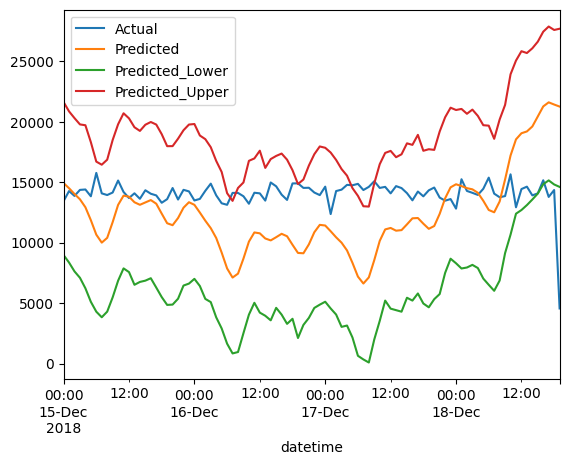

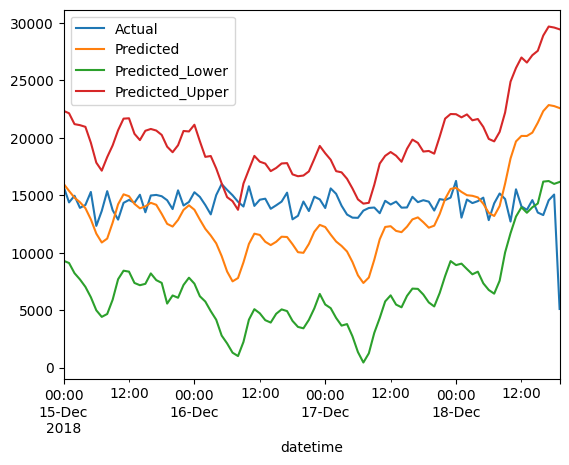

In [29]:
df_uber_forecasted = timeseries_model(df_uber, "2018-12-15")
df_lyft_forecasted = timeseries_model(df_lyft, "2018-12-15")